In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof as get


In [198]:
#pd.show_versions()

In [4]:
M1 = pd.read_csv("C:\\Users\\samin\\Desktop\\Homework2\\Data\\yellow_tripdata_2018-01.csv", encoding = 'latin-1')



In [5]:
#size of our data frame
get(M1)

2855719028

In [6]:
print(M1.shape)

(8759874, 17)


In [7]:
M1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [8]:
M1.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


In [9]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [10]:
# ANY NAN VALUES IN THE MONTH OF JANUARY?


#is there any NaN (not a number) values in the dataframe?
#Returns a dataframe of boolena values (true/false)
#M1.isnull()

#Now find only those columns which have NaN values
#M1.isnull().any()

#one more any() will tell us if any of the above is true?
M1.isnull().any().any()


False

In [11]:
#another way to see if our dataframe has any NaN vales
M1.isnull().values.any()


False

# RQ1

In [12]:
#to answer this question, we need for columns. So, we drob the others. 
#keep tpep_pickup_datetime, tpep_dropoff_datetime, PULocationID, DOLocationID

#dropping vs keeping the ones I need?
#df.drop(columns=['', 'C'])
M2 = M1.filter(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID'])
#free the memory from this big object M1 is! 
del M1


In [13]:
M2.head(2)

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
0,2018-01-01 00:21:05,2018-01-01 00:24:23,41,24
1,2018-01-01 00:44:55,2018-01-01 01:03:05,239,140


In [14]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
PULocationID             int64
DOLocationID             int64
dtypes: int64(2), object(2)
memory usage: 267.3+ MB


In [15]:
# we have two datetime objects. Let's convert them into usable data columns:  day, hour, minutes,..

#M2["hour"] = [t.hour for t in pd.DatetimeIndex(M2.datetime)]
#M2["day"] = [t.dayofweek for t in pd.DatetimeIndex(M2.datetime)]

M2['pickup_day'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).day
#M2['pickup_hour'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).hour

M2['dropoff_day'] = pd.DatetimeIndex(M2['tpep_dropoff_datetime']).day
#M2['dropoff_hour'] = pd.DatetimeIndex(M2['tpep_dropoff_datetime']).hour


#M2['tpep_pickup-datetime'] = pd.to_datetime(M2['tpep_pickup_datetime'])
#M2.info()
#M2['Hour'] = M2['tpep_pickup_datetime'].apply(lambda time:time.hour)
#M2['Day'] = M2['tpep_pickup_datetime'].apply(lambda time: time.dayofweek)
#M2['Month'] = M2['tpep_pickup_datetime'].apply(lambda time: time.month)
#M2['year'] = M2['tpep_pickup_datetime'].apply(lambda time: time.year)


In [16]:
M2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,pickup_day,dropoff_day
0,2018-01-01 00:21:05,2018-01-01 00:24:23,41,24,1,1
1,2018-01-01 00:44:55,2018-01-01 01:03:05,239,140,1,1
2,2018-01-01 00:08:26,2018-01-01 00:14:21,262,141,1,1
3,2018-01-01 00:20:22,2018-01-01 00:52:51,140,257,1,1
4,2018-01-01 00:09:18,2018-01-01 00:27:06,246,239,1,1


In [17]:
#Drop the columns we don't need anymore
M3 = M2.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [18]:
#Free up memory space 
del M2

In [19]:
M3.head()

,PULocationID,DOLocationID,pickup_day,dropoff_day
0,41,24,1,1
1,239,140,1,1
2,262,141,1,1
3,140,257,1,1
4,246,239,1,1


In [20]:
#concatenate(join/merge)M3 and taxi_zone_lookup dataframe

#read taxi_zone_lookup
borough = pd.read_csv(r"C:\Users\samin\Desktop\Homework2\taxi_zone_lookup.csv")

In [21]:
borough.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [22]:
borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
LocationID      265 non-null int64
Borough         265 non-null object
Zone            264 non-null object
service_zone    263 non-null object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [44]:
#the key column is LocationID in boroughs and (PULocationID or DOLocationID) in M3. They contain the same data: LocationIDs. 
#How to merge these two dataframes when two columns' keys are not in the same order?

result = pd.merge(M3,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()


,PULocationID,DOLocationID,pickup_day,dropoff_day,LocationID,Borough
0,41,24,1,1,41,Manhattan
1,41,74,1,1,41,Manhattan
2,41,41,1,1,41,Manhattan
3,41,112,1,1,41,Manhattan
4,41,223,1,1,41,Manhattan


In [24]:
print("M3 dimensions: {}".format(M3.shape))
print("borough dimensions: {}".format(borough.shape))
print("result dimension: {}".format(result.shape))



M3 dimensions: (8759874, 4)
borough dimensions: (265, 4)
result dimension: (8759874, 6)


In [45]:
#The pickup boroughs are taken into consideration

M4 = result.drop(['DOLocationID', 'LocationID','dropoff_day'], 1)
M4.head()

,PULocationID,pickup_day,Borough
0,41,1,Manhattan
1,41,1,Manhattan
2,41,1,Manhattan
3,41,1,Manhattan
4,41,1,Manhattan


In [46]:
del result 

In [47]:
#now, we need to use groupby function. We need the frequency of taxis used in each day and for each borough seperately. 
#first we group by based on our boroughs.

M4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759874 entries, 0 to 8759873
Data columns (total 3 columns):
PULocationID    int64
pickup_day      int64
Borough         object
dtypes: int64(2), object(1)
memory usage: 267.3+ MB


In [50]:
M4.groupby(['Borough']).groups.keys()

dict_keys(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown'])

In [52]:
len(M4.groupby(['Borough']).groups['Bronx'])

#len(M4.groupby(['Borough']).groups['unknown'])

7389

In [51]:
len(M4.groupby(['Borough']).groups['Brooklyn'])

100250

In [53]:
len(M4.groupby(['Borough']).groups['EWR'])

571

In [54]:
len(M4.groupby(['Borough']).groups['Manhattan'])

7965703

In [55]:
len(M4.groupby(['Borough']).groups['Queens'])

526906

In [56]:
len(M4.groupby(['Borough']).groups['Staten Island'])

144

In [57]:
len(M4.groupby(['Borough']).groups['Unknown'])

158911

In [60]:
M4.groupby('Borough')['pickup_day'].count()

Borough
Bronx               7389
Brooklyn          100250
EWR                  571
Manhattan        7965703
Queens            526906
Staten Island        144
Unknown           158911
Name: pickup_day, dtype: int64

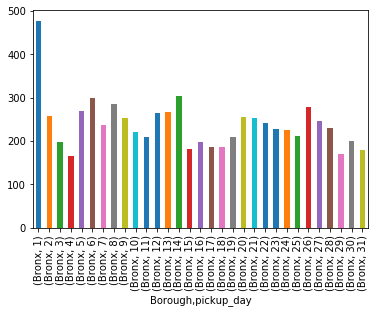

In [67]:
# I think we can plot this but what about the unknown variable?
# Do we have to remove it?
df=M4[M4['Borough'] == 'Bronx'].groupby(['Borough', 'pickup_day'])['pickup_day'].count()
df.plot.bar()

#data[data['item'] == 'call'].groupby('network')['duration'].sum()

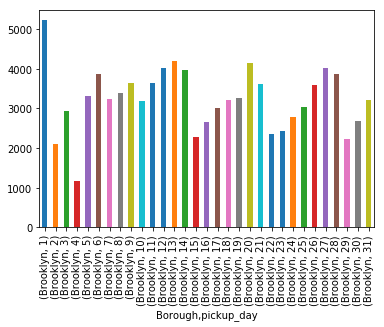

In [68]:
df = M4[M4['Borough'] == 'Brooklyn'].groupby(['Borough', 'pickup_day'])['pickup_day'].count()
df.plot.bar()

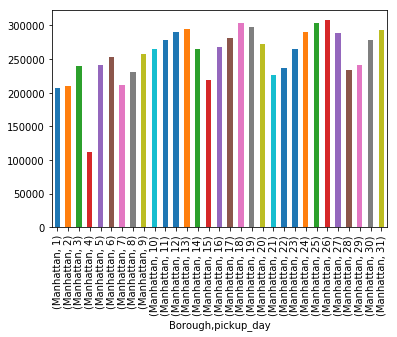

In [69]:
df = M4[M4['Borough'] == 'Manhattan'].groupby(['Borough', 'pickup_day'])['pickup_day'].count()
df.plot.bar()

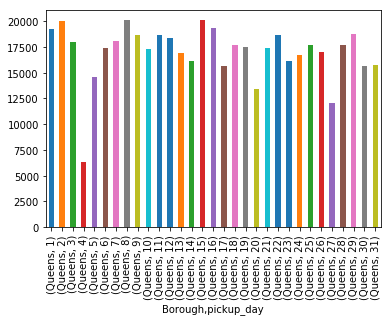

In [70]:
df = M4[M4['Borough'] == 'Queens'].groupby(['Borough', 'pickup_day'])['pickup_day'].count()
df.plot.bar()

### Observations
###### 1. Manhattan has the highest trafic of taxis. 
###### 2. Not much can be understood from the plot. Just the fourth day of month in each borough has a lower trafic. To understand why, we need to refer to the clalnder of NewYork city. Maybe it has been an off day and not many people have been outside. 
pickups are more heavily concentrated in Manhattan, while drop offs extend further into the outer boroughs.